# K-mean clustering and linear regression

kmeans(x, centers, iter.max = 10, nstart = 1, algorithm = c(“Hartigan-Wong”, “Lloyd”, “Forgy”, “MacQueen”))

#### Arguments
x: A numeric matrix of data, or an object that can be coerced to such a
matrix (such as a numeric vector or a data frame with all numeric
columns).

centers: Either the number of clusters or a set of initial (distinct) cluster
centres. If a number, a random set of (distinct) rows in x is chosen as the
initial centres.

iter.max: The maximum number of iterations allowed.

nstart: If centers is a number, how many random sets should be chosen?

algorithm: character: may be abbreviated.

#### Result
An object of class “kmeans” which is a list with components:

cluster: A vector of integers indicating the cluster to which each point is
allocated.

centers: A matrix of cluster centres.

withinss: The within-cluster sum of squares for each cluster.

size: The number of points in each cluster.

### K-mean clustering

Let's first generate some random data that comes from two normal distributions, and run k-mean clustering on them.

In [1]:
x  <-  rbind(matrix(rnorm(100, mean = 0, sd  =  0.3),  ncol  =  2), matrix(rnorm(100,  mean  =  1,  sd  =  0.3),  ncol  =  2))

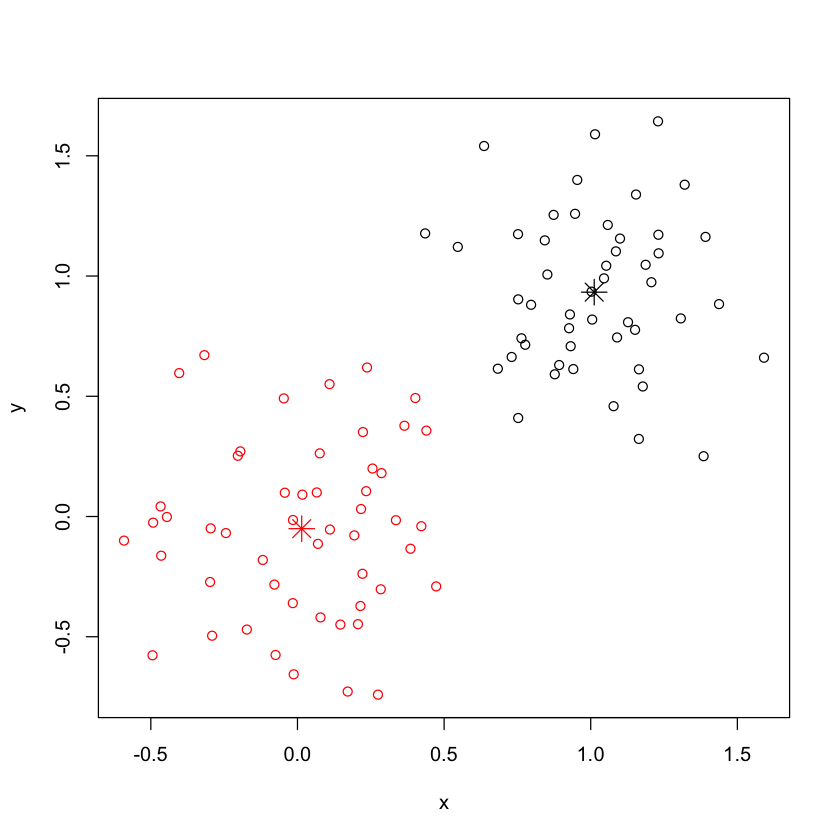

In [2]:
colnames(x)  <-  c("x",  "y")
cl  <-  kmeans(x,  2)
plot(x, col = cl$cluster)
points(cl$centers, col = 1:2, pch = 8, cex=2)

In [3]:
cl

K-means clustering with 2 clusters of sizes 49, 51

Cluster means:
           x           y
1 1.01188734  0.93290462
2 0.01443618 -0.05056779

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1

Within cluster sum of squares by cluster:
[1]  7.780191 10.669751
 (between_SS / total_SS =  72.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

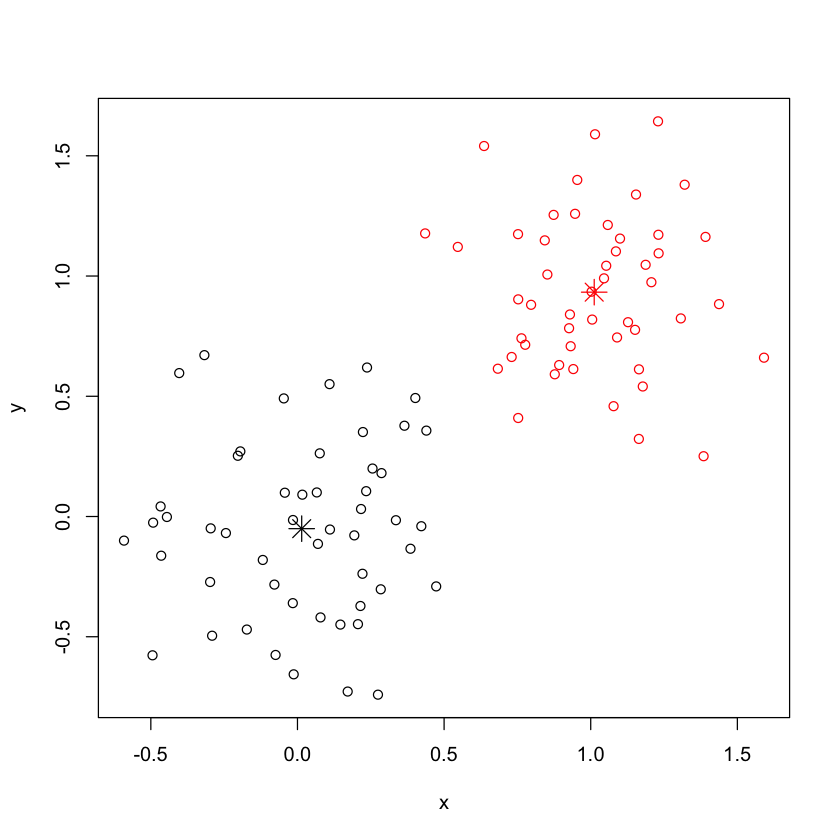

In [4]:
cl  <-  kmeans(x,  2,  10,  2,  "Lloyd")
plot(x, col = cl$cluster)
points(cl$centers, col = 1:2, pch = 8, cex=2)

## K-Means clustering with real data

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [5]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [6]:
myiris  <-  iris  #  copy  built  in  data head(myiris)
myiris$Species  <-  NULL 
head(myiris) 
dim(myiris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


[1] 150   4

In [8]:
myiris <- scale(myiris)
myiris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.89767388,1.01560199,-1.335752,-1.3110521
-1.13920048,-0.13153881,-1.335752,-1.3110521
-1.38072709,0.32731751,-1.392399,-1.3110521
-1.50149039,0.09788935,-1.279104,-1.3110521
-1.01843718,1.24503015,-1.335752,-1.3110521
-0.53538397,1.93331463,-1.165809,-1.0486668
-1.50149039,0.78617383,-1.335752,-1.1798595
-1.01843718,0.78617383,-1.279104,-1.3110521
-1.74301699,-0.36096697,-1.335752,-1.3110521
-1.13920048,0.09788935,-1.279104,-1.4422448


WSS: The sum distance within the centroids. Since the K-means algorithm's goal is to keep the size of each cluster as small as possible, the small wss indicates that every data point is close to its nearest centroids, or say the model has returned good results.

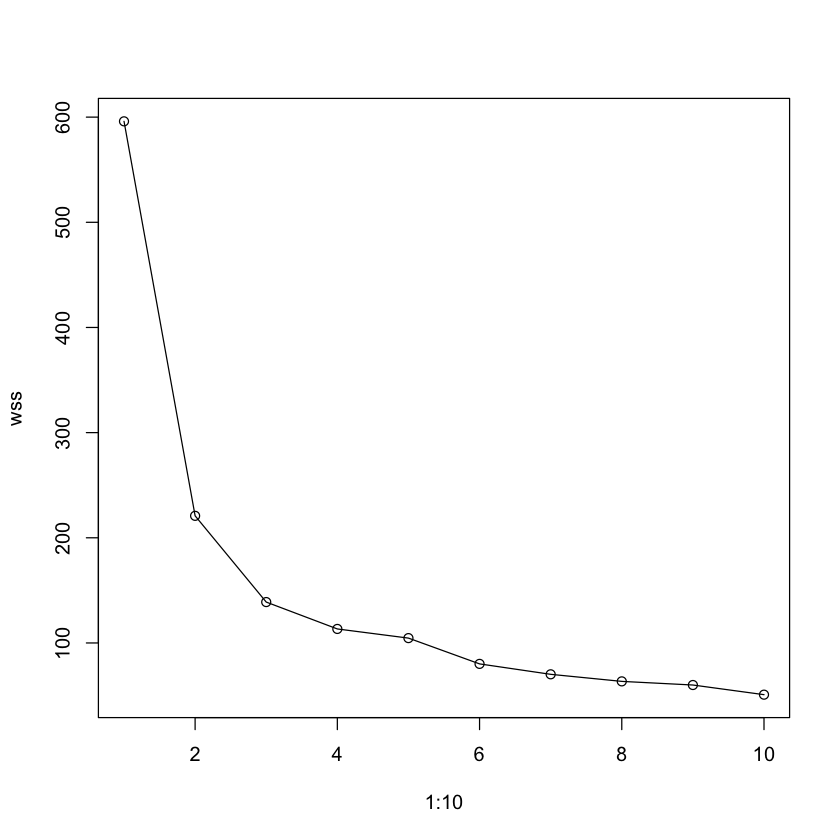

In [9]:
# to reproduce the results
# you have to use set.seed()
set.seed(1)
wss<- NULL
for (i in 1:10){
  fit = kmeans(myiris,centers = i)
  wss = c(wss, fit$tot.withinss)
}
plot(1:10, wss, type = "o")

In [10]:
#Apply  kmeans  to  newiris,  and  store  the  clustering  result  in  kc. 
kc  <-  kmeans(myiris,  3)  #  3  clusters...  we  'know'  there  are  3,  try 2 or 4
kc # and display


K-means clustering with 3 clusters of sizes 53, 47, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1  -0.05005221 -0.88042696    0.3465767   0.2805873
2   1.13217737  0.08812645    0.9928284   1.0141287
3  -1.01119138  0.85041372   -1.3006301  -1.2507035

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 [75] 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

Within cluster sum of squares by cluster:
[1] 44.08754 47.45019 47.35062
 (between_SS / total_SS =  76.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [11]:
iris$Species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [12]:
kc$cluster

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 [75] 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

In [51]:
table(iris$Species,  kc$cluster)  #  Compare  the  Species  label  with  th e clustering result

            
              1  2  3
  setosa      0  0 50
  versicolor 48  2  0
  virginica  14 36  0

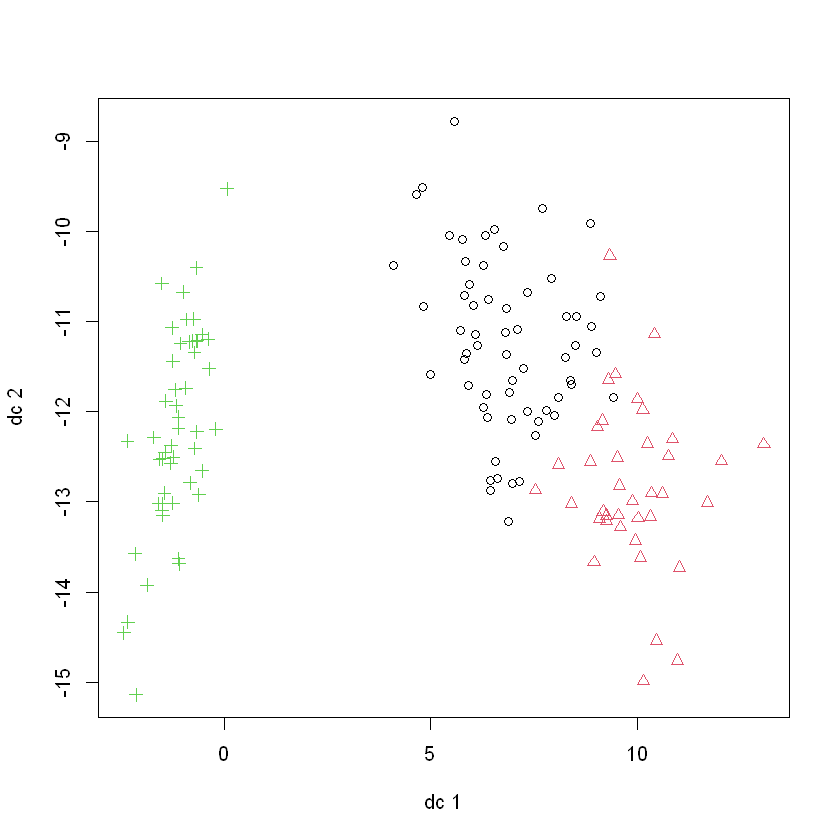

In [52]:
library(fpc)
plotcluster(iris[,-5],kc$cluster,pointsbyclvecd=FALSE)

# Linear Regression

We will look at the relationship between miles per gallon (mpg) and horsepower (hp), for different cars using a range of lines.

In [28]:
head(mtcars)  #  built  in  db

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


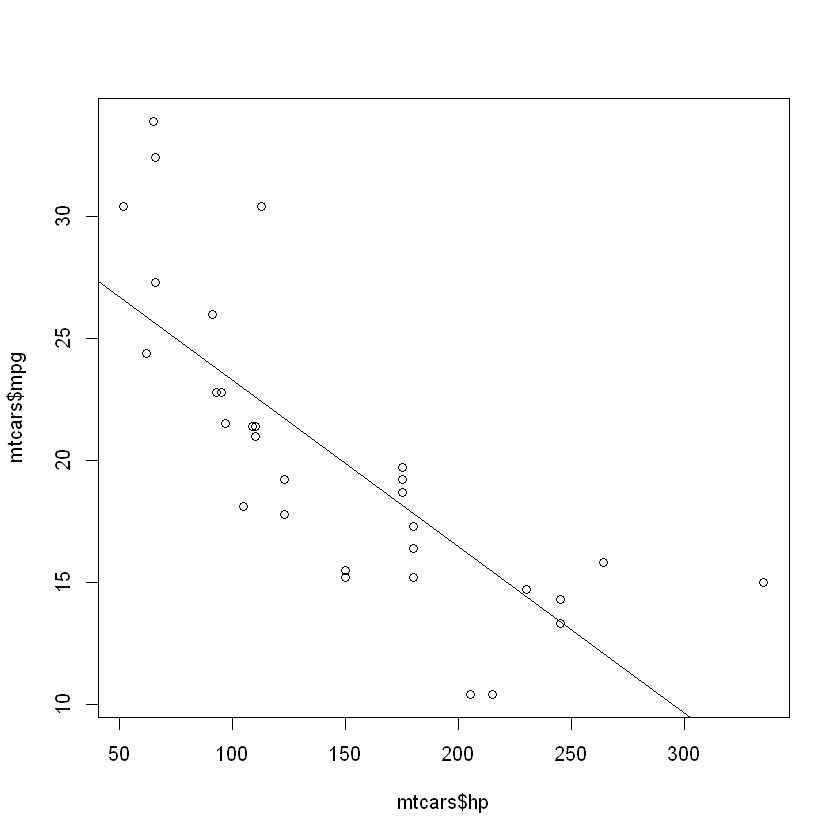

In [29]:
# do a basic plot and add a regression line 
plot(mtcars$mpg~mtcars$hp) 
abline(lm(mtcars$mpg~mtcars$hp))  #  linear  regression

In [30]:
lm(mtcars$mpg~mtcars$hp)  #  print  out  the  coefficients


Call:
lm(formula = mtcars$mpg ~ mtcars$hp)

Coefficients:
(Intercept)    mtcars$hp  
   30.09886     -0.06823  


In [31]:
require(ggplot2) 
#require(methods)

Loading required package: ggplot2



In [32]:
p  <-  ggplot(mtcars,  aes(x  =  hp,  y  =  mpg))  +  geom_point()  #  p  is  the base plot
#  print(p)  #  no  need  for  print()  in  this  version  of  R,  just  'p' p

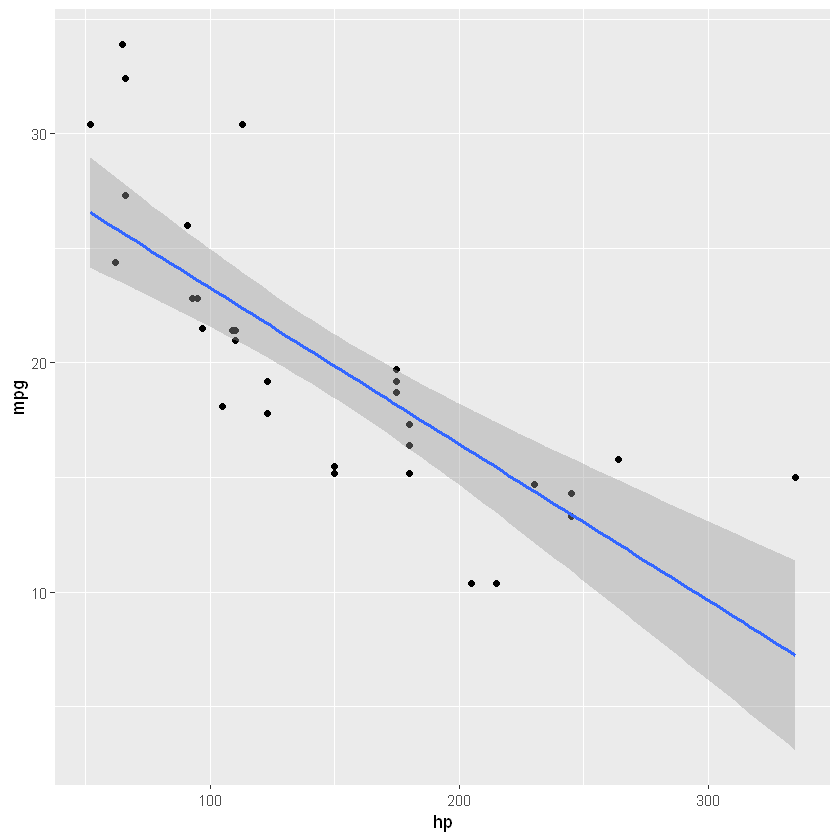

In [33]:
p + stat_smooth(method  =  "lm",  formula  =  y  ~  x,  size  =  1)

Loess regression is a nonparametric technique that uses local weighted regression to fit a smooth curve through points in a scatter plot. 

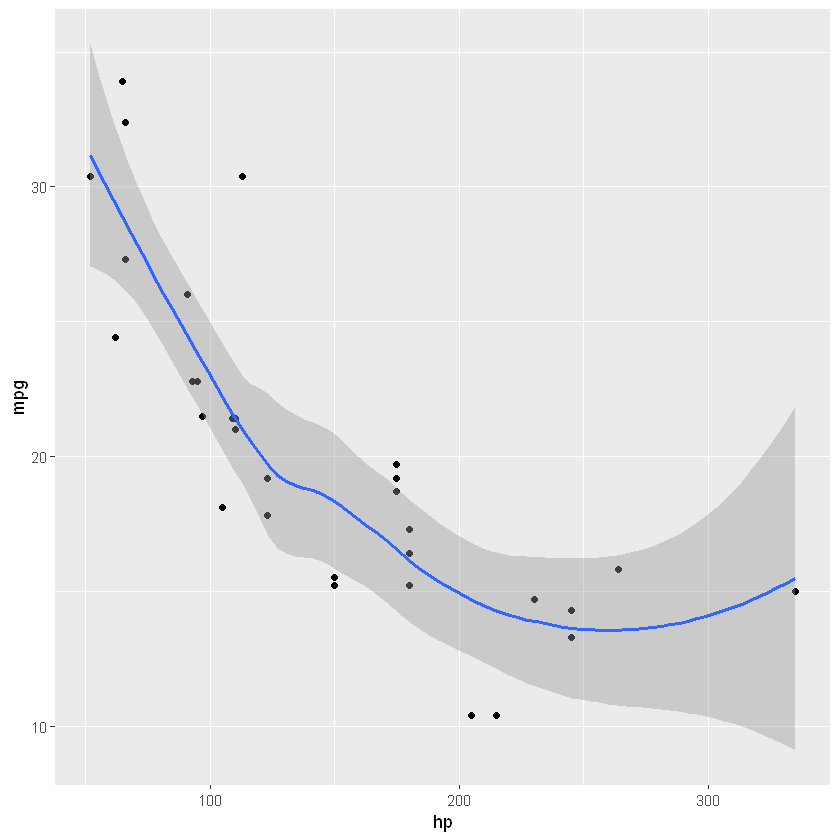

In [34]:
p  +  stat_smooth(method  =  "loess",  formula  =  y  ~  x,  size  =  1)

Looking at the fit, it seems a quadratic function might be a good approximation.

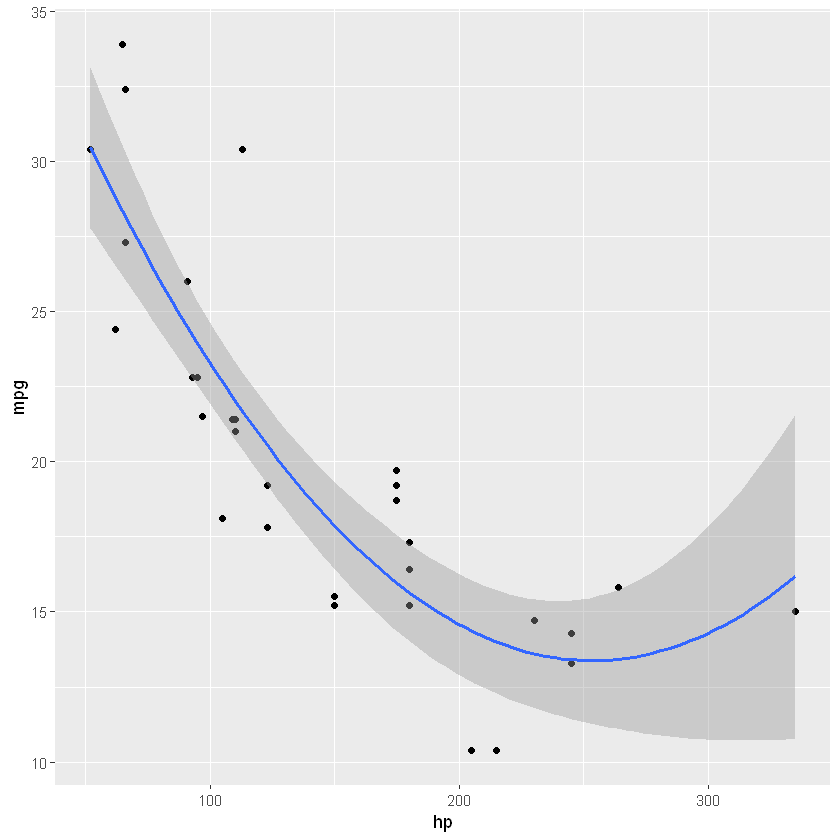

In [35]:
p  +  stat_smooth(method  =  "lm",  formula  =  y  ~  x  +  I(x^2),  size  =  1)

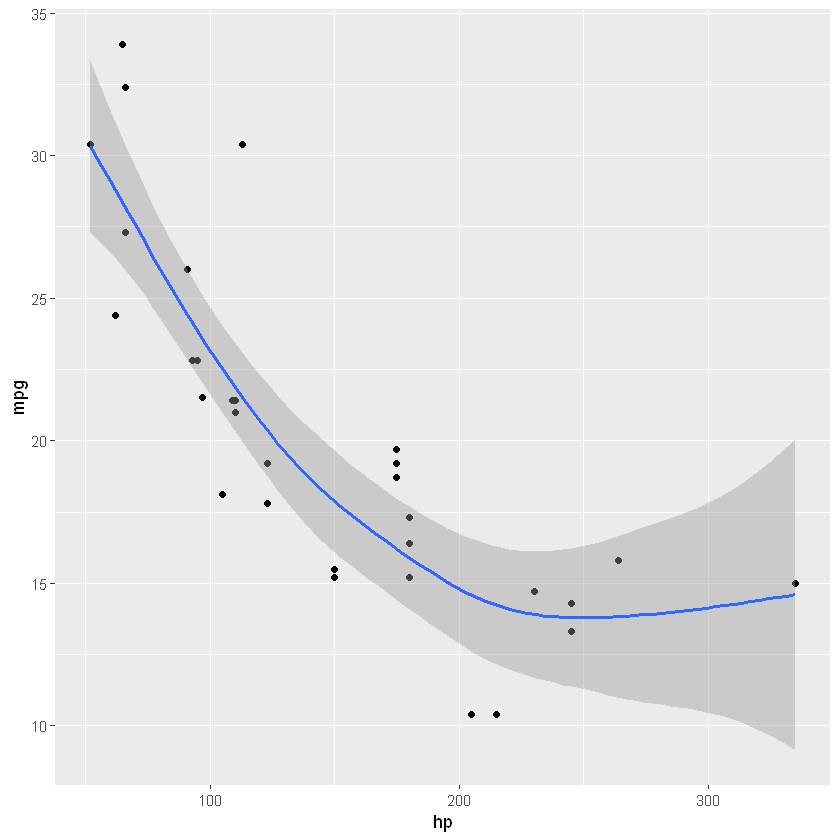

In [36]:
p  +  stat_smooth(method  =  "gam",  formula  =  y  ~  s(x),  size  =  1)

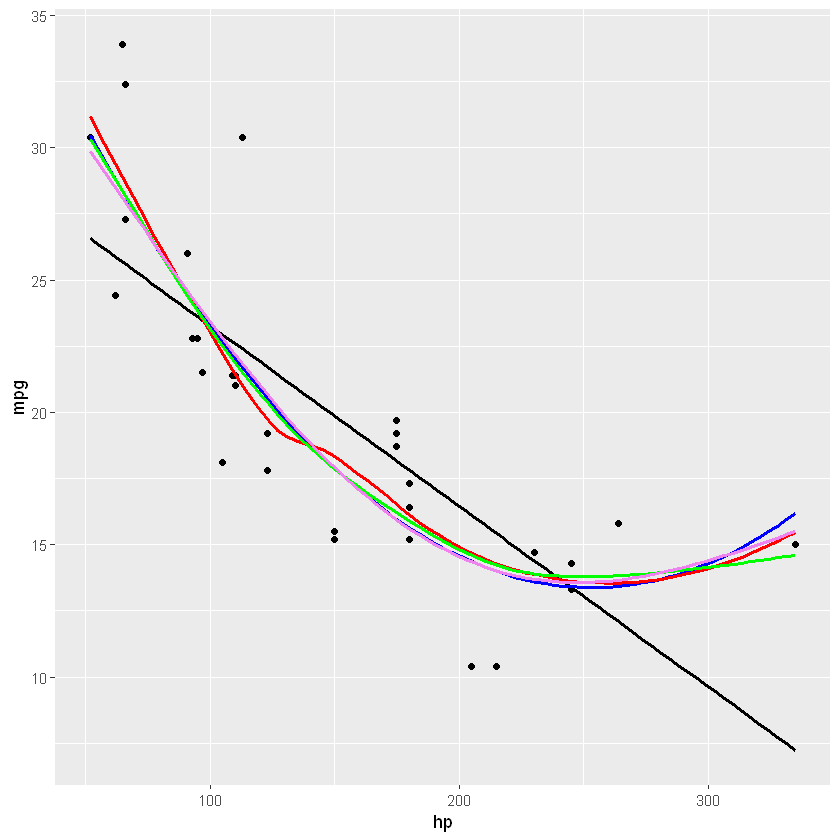

In [37]:
#  If  we  wanted  to  directly  compare,  we  could  add  multiple  smooths  a nd  colour  them  to  see  which  we  like  best.
#  By  default  each  smooth  would  include  shaded  standard  errors,  whic h  would  be  messy  so  we  turn  them  off.
s1  <-  stat_smooth(method  =  "lm",  formula  =  y  ~  x,  size  =  1,  se  =  FALSE,  colour  =  "black")
s2  <-  stat_smooth(method  =  "lm",  formula  =  y  ~  x  +  I(x^2),size  =  1, se  =  FALSE,  colour  =  "blue")
s3  <-  stat_smooth(method  =  "loess",  formula  =  y  ~  x,  size  =  1,  se  = FALSE,  colour  =  "red")
s4  <-  stat_smooth(method  =  "gam",  formula  =  y  ~  s(x),  size  =  1,  se =  FALSE,  colour  =  "green")
s5  <-  stat_smooth(method  =  "gam",  formula  =  y  ~  s(x,  k  =  3),  size  = 1,  se  =  FALSE,  colour  =  "violet")
p + s1 + s2 + s3 + s4 + s5
